# Introduction

Le but de ce notebook est d'analyser un dataset contenant des données sur la santé, le sommeil et le mode de vie de 374 personnes dans le but de trouver des corrélations entre différentes variables et pouvoir expliquer certains troubles du sommeil.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("Health_sleep.csv")

In [3]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


# Data cleaning

La première étape de toute EDA (Exploratory Data Analysis) est le nettoyage des données. Ici, le dataset est plutôt propre bien que quelques modifications doivent être effectuées.

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Person ID - 0%
Gender - 0%
Age - 0%
Occupation - 0%
Sleep Duration - 0%
Quality of Sleep - 0%
Physical Activity Level - 0%
Stress Level - 0%
BMI Category - 0%
Blood Pressure - 0%
Heart Rate - 0%
Daily Steps - 0%
Sleep Disorder - 0%


In [7]:
print(df.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


Il n'y a pas de données manquantes. Dans un premier temps, on supprimera la variable ``Person ID`` qui est inutile et on transformera la variable ``Blood Pressure`` de type object qui contient la pression minimale et maximale de chaque individu en deux autres variables ``High_pressure`` et ``Low_pressure`` de type float.

In [8]:
df.drop('Person ID', axis=1, inplace=True)

In [9]:
high_pressure=[]
low_pressure = []
for i in df['Blood Pressure']:
    high_pressure+=[i.split('/')[0]]
    low_pressure+=[i.split('/')[1]]

df['High_pressure'] = high_pressure
df['Low_pressure'] = low_pressure


df.drop('Blood Pressure', axis=1, inplace = True)

df['High_pressure'] = df['High_pressure'].astype(float)
df['Low_pressure'] = df['Low_pressure'].astype(float)

In [10]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

Il semblerait que ``Normal Weight`` et ``Normal`` signifient la même chose, on peut donc regrouper ces deux catégories dans une même catégorie. De plus, du fait du peu d'échantillon dans la catégorie ``Obese``, on peut regrouper cette catégorie avec la catégorie ``Overweight``.

In [11]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
df['BMI Category'] = df['BMI Category'].replace('Obese', 'Overweight')

In [13]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

Du fait du peu d'échantillons pour les métiers de ``Software Enginner``, ``Scientist``, ``Sales Representative`` et ``Manager``, on peut regrouper ces 4 métiers dans une seule et même catégorie qu'on nommera ``Unknown``. Ceci a pour but de ne pas biaisier les futures analyses avec des métiers qui ne contiennent que très peu d'échantillons.

In [14]:
to_replace = ['Software Engineer', 'Scientist', 'Sales Representative', 'Manager']
df['Occupation'] = df['Occupation'].replace(to_replace, 'Unknown')

In [84]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,High_pressure,Low_pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


# Visualisation

La 2ème partie de ce notebook consiste à visualiser les données. Le but étant de déduire des corrélations entre les troubles du sommeil et les autres variables(santé et mode de vie). 

Pour ce faire, on analysera dans un premier temps les variables numériques (qualité du sommeil, age, durée du sommeil, activité physique, nombre de pas journalier,n niveau de stress, rythme cardiaque, pression artérielle) à l'aide d'une heatmap, de histplot et de boxplot.

Enfin, on analysera les variables catégories (sexe, métier, catégorie IMC)

C:\Users\danih\AppData\Local\Temp\ipykernel_13324\195471851.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

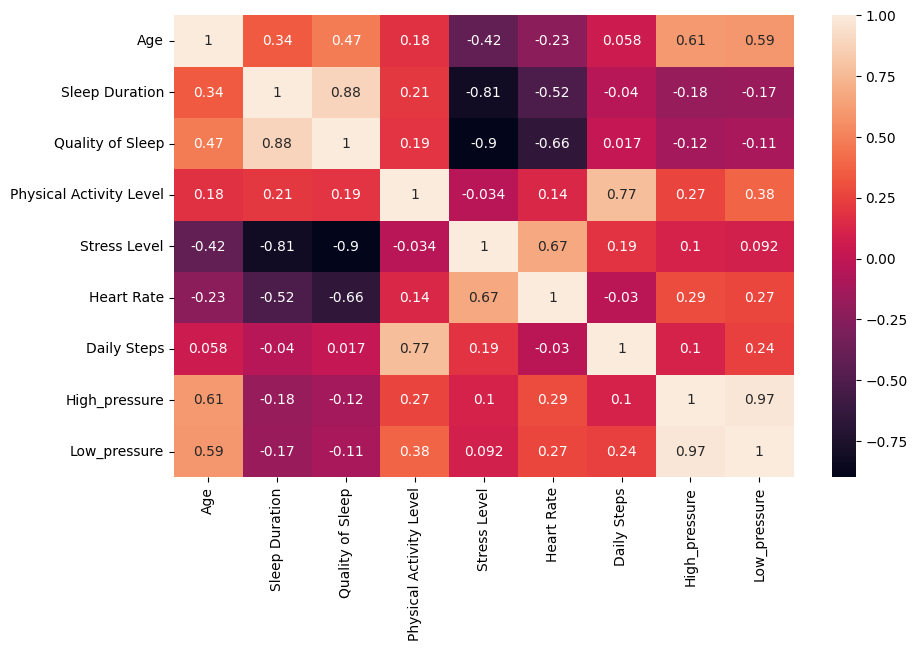

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

La heatmap nous informe que la qualité et la durée du sommeil sont fortement corrélés au niveau de stress. La qualité et la durée du sommeil est aussi corrélé à l'âge.

In [21]:

num_col=['Age','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'\
         ,'High_pressure', 'Low_pressure' ]

cat_col=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

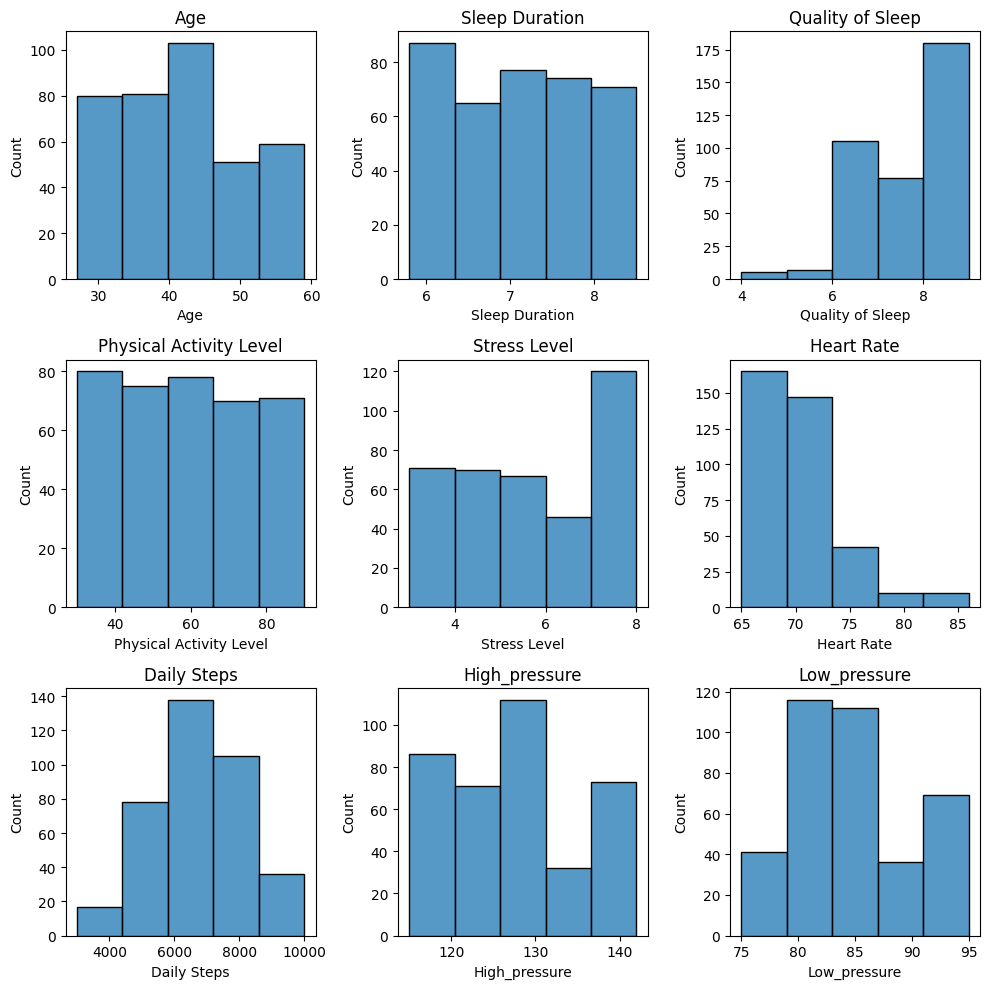

In [22]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.histplot(data=df,x=df[num_col[i]],bins=5)
plt.tight_layout()
plt.show()

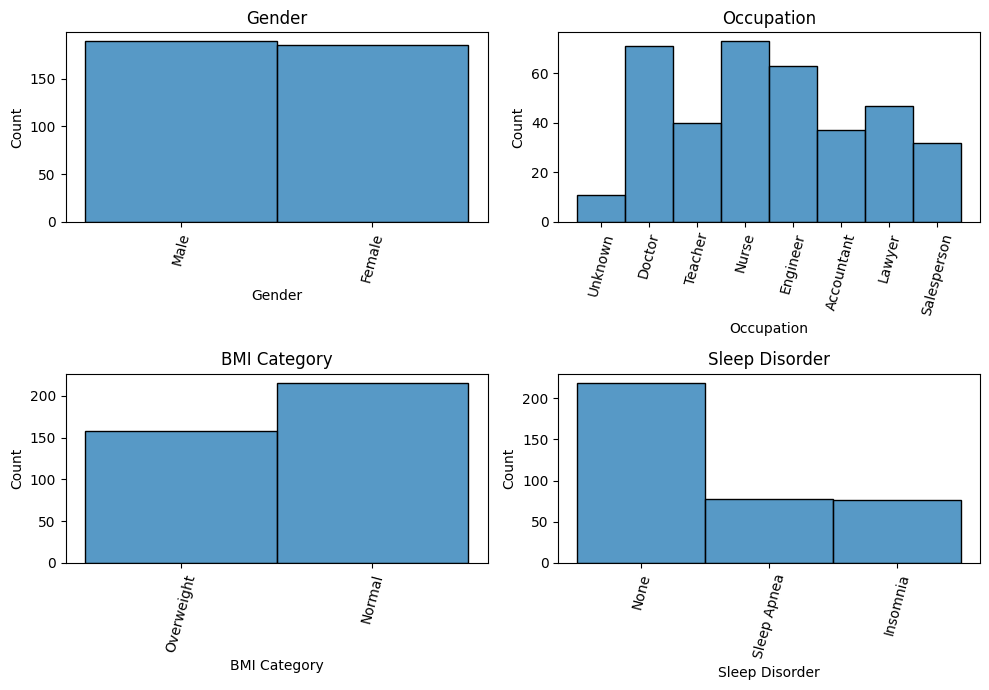

In [23]:
fig = plt.figure(figsize=(10,7))

for i in range(len(cat_col)):
    plt.subplot(2,2,i+1)
    plt.title(cat_col[i])
    sns.histplot(data=df,x=df[cat_col[i]],bins=10)
    plt.xticks(rotation=75) 
plt.tight_layout()
plt.show()


## Relation entre les troubles du sommeil et les variables numériques.

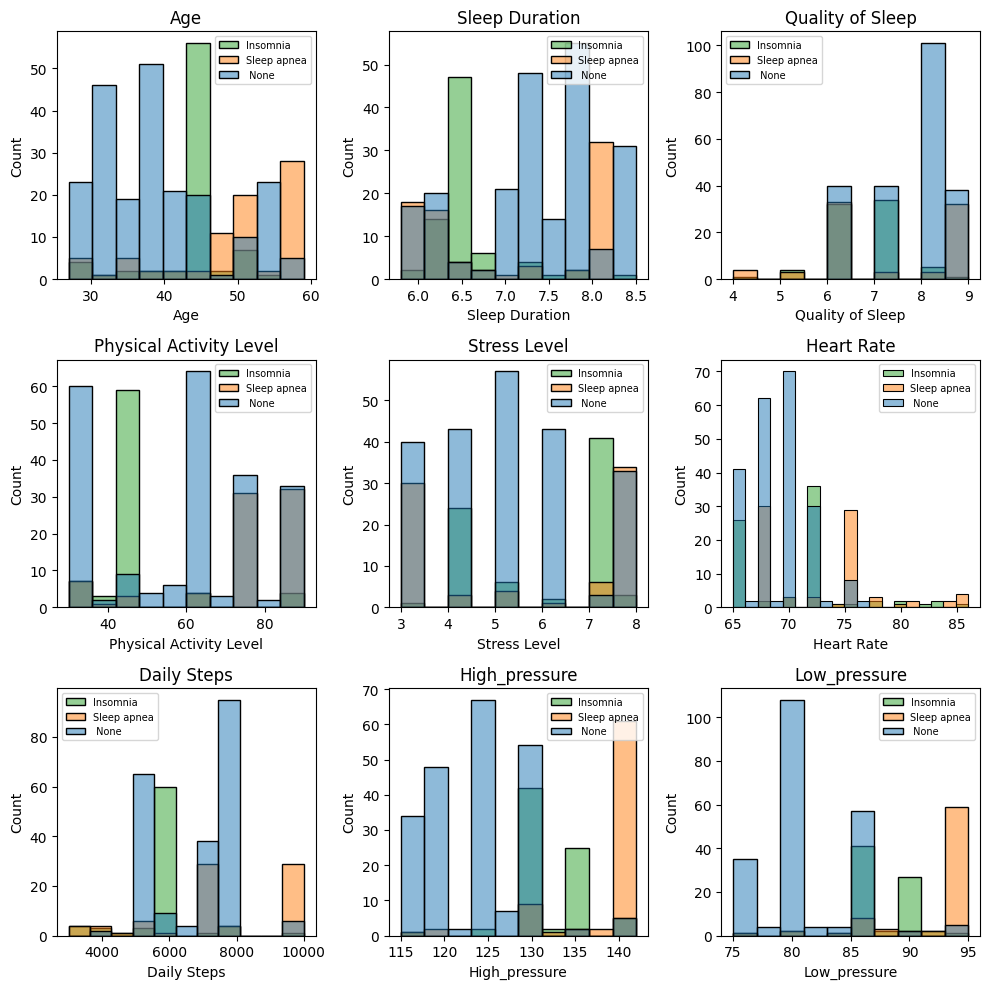

In [69]:



fig = plt.figure(figsize=(10,10))

for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.histplot(data=df,x=df[num_col[i]],hue='Sleep Disorder')
    plt.legend(fontsize=7,labels = ['Insomnia', 'Sleep apnea', ' None '])
plt.tight_layout()
plt.show()

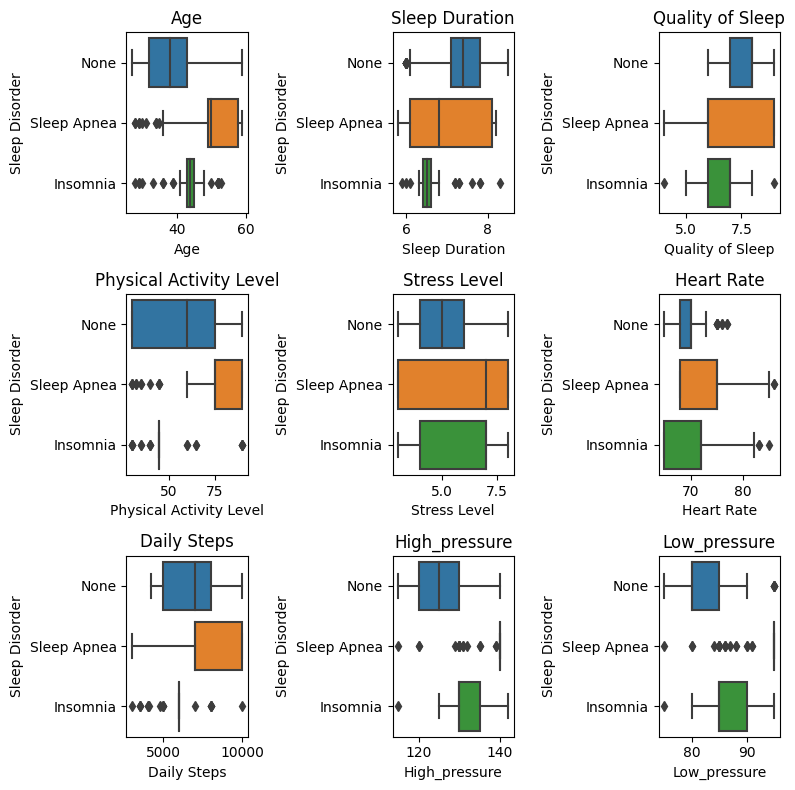

In [76]:
fig = plt.figure(figsize=(8,8))

for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.title(num_col[i])
    sns.boxplot(data=df,y=df['Sleep Disorder'],x=df[num_col[i]])
plt.tight_layout()
plt.show()

On remarque avec les boxplots que l'apnée du sommeil est plus fréquente chez les personnes plus âgées et chez les personnes plus sportives. Ce qui ne semble pas forcément intuitif.

## Relation entre troubles du sommeil et variables catégoriques

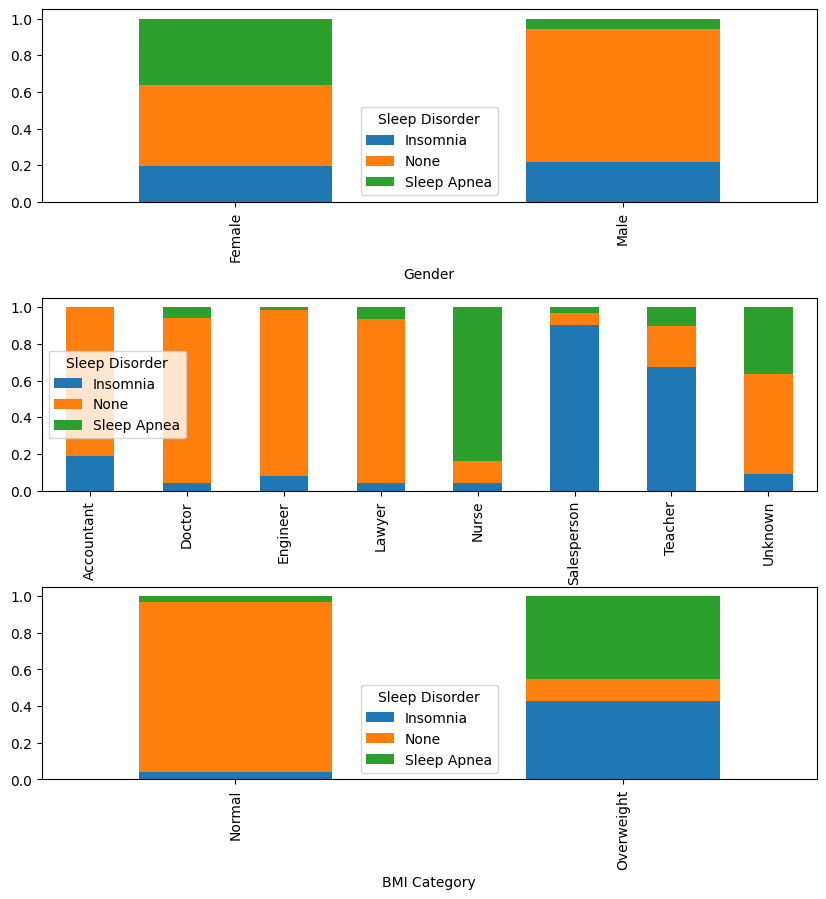

In [31]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)


for i,cat in enumerate(cat_col[:-1]):
    
    counts = (df.groupby([cat])['Sleep Disorder']
                      .value_counts(normalize=True)
                      .unstack())

    counts.plot(kind='bar', stacked=True, ax=axs[i])

On remarque des choses intéressantes et étonnantes.
- Les femmes sont plus enclines à faire de l'apnée du sommeil.
- Les infirmiers font presque tous de l'apnée du sommeil. Ceci semble très étonnant à première vue. Les professeurs et les vendeurs sont plus enclins aux insomnies.
- Les personnes en surpoids ont en grande partie des troubles du sommeil. Tandis que les personnes de poids normaux n'en ont quasiment aucun. La différente est vraiment écrasante entre les deux catégories, intiuitivement la différence ne devrait pas être aussi grande.

## Durée de sommeil en fonction de l'âge et du poids

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


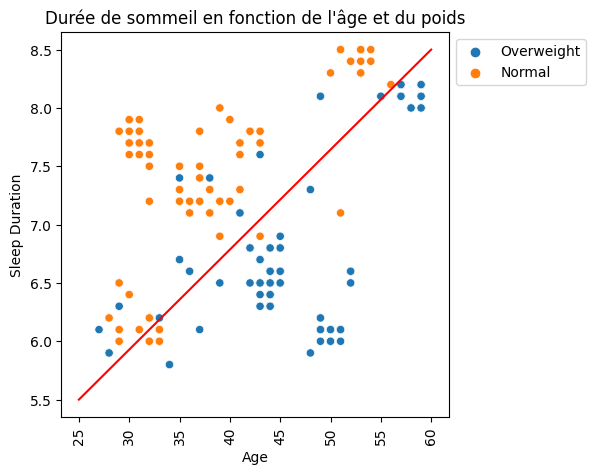

In [33]:
plt.figure(figsize=(5, 5))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df['Age'],y=df['Sleep Duration'],hue=df['BMI Category'],data=df,sizes=(50,500))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
x_lim = [25,60]
y_lim = [5.5,8.5]
plt.plot(x_lim, y_lim,color="red")
plt.title("Durée de sommeil en fonction de l'âge et du poids")
plt.show()

Les personnes en surpoids dorment moins que les autres.

# Conclusion :

Il semblerait que les troubles du sommeil soient principalement corrélés à l'âge, au métier et au poids. Pour l'âge cela peut sembler intuitif. Pour le poids, cela semble également intuitif mais pas dans de telles proportions. Pour le métier cela me semble plus étonnant. Par exemple le fait que 90% des infirmiers font de l'apnée du sommeil, tandis que les docteurs ou les ingénieurs n'ont aucun trouble du sommeil est très intrigant.

Cela pourrait être expliqué par un biais de sélection. Pour s'assurer de la présence d'un biais de sélection, il faudrait comparer ce dataset avec d'autres dataset du même style.